<a href="https://colab.research.google.com/github/BenitoSupreme/OperationCrypto/blob/main/Scrape_Crypto_Site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
#import our modules and packages that we will need to scrape a website
import csv
from bs4 import BeautifulSoup
import requests
import time
from google.colab import files
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction import _stop_words

# pre-processing of text
import string
import re

# sentiment analysis package
from textblob import TextBlob

#Grab words from Coin Desk and put them into differnet datatypes ex. dataframe and list

In [ ]:
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36",
    "from": "CoinDesk"
}

page = requests.get("https://www.coindesk.com/business/2023/06/06/secs-latest-crackdown-could-drive-crypto-firms-out-of-the-us/", headers=headers)
page_content = page.content

soup = BeautifulSoup(page_content, "html.parser")
article_content = soup.find("div", class_="contentstyle__StyledWrapper-g5cdrh-0 ipXuoZ composer-content")

if article_content is not None:
    # Extract all the text from the article content
    text = article_content.get_text()

    # Split the text into individual words
    words = text.split()

    # list of words in article
    word_list = []

    # Print the words
    for word in words:
        word_list.append(word)

    # make a dataframe from word_list
    words_df = pd.DataFrame(word_list, columns=['Contents']) 
       
else:
    print("Article content not found.")



In [ ]:
words_df

,Contents
0,Some
1,industry
2,experts
3,say
4,the
...,...
541,be
542,in
543,"charge,”"
544,Palmer


In [ ]:
word_list

['Some',
 'industry',
 'experts',
 'say',
 'the',
 'SEC’s',
 'recent',
 'actions',
 'against',
 'U.S.-based',
 'Coinbase',
 'and',
 'Cayman',
 'Islands-based',
 'Binance',
 'could',
 'be',
 'a',
 'net',
 'positive',
 'for',
 'companies',
 'operating',
 'in',
 'the',
 'U.S,',
 'given',
 'the',
 'regulatory',
 'clarity',
 'they',
 'could',
 'help',
 'bring',
 'in',
 'the',
 'long',
 'run.',
 'In',
 'the',
 'short',
 'to',
 'medium',
 'term,',
 'however,',
 'these',
 'actions',
 'could',
 'force',
 'these',
 'firms',
 'to',
 'focus',
 'their',
 'efforts',
 'elsewhere.“Regulatory',
 'pressure',
 'does',
 'create',
 'an',
 'incentive',
 'for',
 'exchanges',
 'to',
 'move',
 'overseas;',
 'for',
 'the',
 'digital',
 'asset',
 'industry',
 'specifically,',
 'it’s',
 'a',
 'much',
 'easier',
 'shift',
 'because',
 'there',
 'are',
 'no',
 'factories',
 'to',
 'move,”',
 'said',
 'Jason',
 'Allegrante,',
 'Chief',
 'Legal',
 'and',
 'Compliance',
 'Officer',
 'at',
 'infrastructure',
 'firm',
 

#Perform text classification on "words"

##Wordcloud to visualize most common words

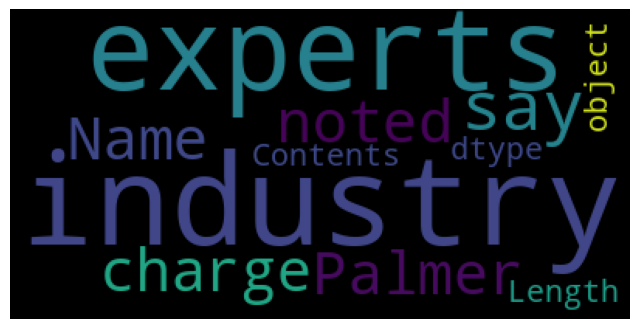

In [ ]:
# Create a word cloud for the text column
wordcloud = WordCloud(max_words=1000,random_state=1).generate(str(words_df['Contents']))

# Plot the WordCloud image
plt.figure(figsize = (8, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show();

##Preprocess Text

In [ ]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace('"', "") # This text contains a lot of quotes.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token.lower() for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [ ]:
doc = " ".join(word_list)

In [ ]:
# preprocessed string of the whole article 

prep_text = clean(doc)
prep_text

'some industry experts say sec’s recent actions usbased coinbase cayman islandsbased binance net positive companies operating us given regulatory clarity help bring long run in short medium term actions force firms focus efforts elsewhere“regulatory pressure does create incentive exchanges overseas digital asset industry specifically it’s easier shift factories move” said jason allegrante chief legal compliance officer infrastructure firm fireblockscoinbase recently announced received license offer services bermuda reportedly plans set cryptotrading platform outside us the exchange doubling operations canada tightened regulations crypto firms allowed coinbase sign enhanced preregistration undertaking signaling intent comply coming new regulatory framework“i suspect moves like this” andrew lawrence cofounder ceo censo inc onchain custody solution said “yes us biggest market people building crypto industry doing size market size market future people seeing future looking good united stat

In [ ]:
# preprocessed list of whole article

# split the string up
prep_text = prep_text.split()

# new list
prep_list = []
for word in prep_text:
  prep_list.append(word)

prep_list

['some',
 'industry',
 'experts',
 'say',
 'sec’s',
 'recent',
 'actions',
 'usbased',
 'coinbase',
 'cayman',
 'islandsbased',
 'binance',
 'net',
 'positive',
 'companies',
 'operating',
 'us',
 'given',
 'regulatory',
 'clarity',
 'help',
 'bring',
 'long',
 'run',
 'in',
 'short',
 'medium',
 'term',
 'actions',
 'force',
 'firms',
 'focus',
 'efforts',
 'elsewhere“regulatory',
 'pressure',
 'does',
 'create',
 'incentive',
 'exchanges',
 'overseas',
 'digital',
 'asset',
 'industry',
 'specifically',
 'it’s',
 'easier',
 'shift',
 'factories',
 'move”',
 'said',
 'jason',
 'allegrante',
 'chief',
 'legal',
 'compliance',
 'officer',
 'infrastructure',
 'firm',
 'fireblockscoinbase',
 'recently',
 'announced',
 'received',
 'license',
 'offer',
 'services',
 'bermuda',
 'reportedly',
 'plans',
 'set',
 'cryptotrading',
 'platform',
 'outside',
 'us',
 'the',
 'exchange',
 'doubling',
 'operations',
 'canada',
 'tightened',
 'regulations',
 'crypto',
 'firms',
 'allowed',
 'coinbase

##Using TextBlob for sentiment analysis on article | Out of vocabulary problem :(

In [ ]:
# Perform sentiment analysis
blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Print sentiment analysis results
print("Text:", text)
print("Sentiment Polarity:", polarity)
print("Sentiment Subjectivity:", subjectivity)

Text: Some industry experts say the SEC’s recent actions against U.S.-based Coinbase and Cayman Islands-based Binance could be a net positive for companies operating in the U.S, given the regulatory clarity they could help bring in the long run. In the short to medium term, however, these actions could force these firms to focus their efforts elsewhere.“Regulatory pressure does create an incentive for exchanges to move overseas; for the digital asset industry specifically, it’s a much easier shift because there are no factories to move,” said Jason Allegrante, Chief Legal and Compliance Officer at infrastructure firm Fireblocks.Coinbase recently announced it received a license to offer its services in Bermuda, where it reportedly plans to set up a crypto-trading platform outside of the U.S. The exchange is also doubling down on its operations in Canada, which has tightened its regulations for crypto firms but allowed Coinbase to sign an enhanced Pre-Registration Undertaking, signaling 

In [ ]:
# # Calculate sentiment polarity for each word
# sentiments = []
# for word in prep_list:
#     blob = TextBlob(word)
#     polarity = blob.sentiment.polarity
#     sentiments.append(polarity)

# # Determine overall sentiment
# overall_sentiment = sum(sentiments) / len(sentiments)

# # Print sentiment values
# print("Sentiment Polarity for Words:")
# for i, word in enumerate(word_list):
#   if i > 200:
#     break
#   else:
#     print(f"{word}: {sentiments[i]}")

    
  
# print("\nOverall Sentiment Polarity:")
# print(overall_sentiment)

##Using VaderSentiment for Sentiment Analysis 

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sentiment_scores = analyzer.polarity_scores(prep_text)


In [ ]:
sentiment_scores

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
# Iterate through the list and analyze sentiment for each individual word
for palabra in prep_list:
    sentiment_scores = analyzer.polarity_scores(palabra)
    print("Text:", palabra)
    print("Sentiment scores:", sentiment_scores)
    print("---")

Text: some
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: industry
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: experts
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: say
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: sec’s
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: recent
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: actions
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: usbased
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: coinbase
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: cayman
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: islandsbased
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
---
Text: binance


###Do vader analysis on each individual sentence

In [ ]:
# step 1: make a list of the sentences
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(text)


# step 2: run sentiment analysis through each element
for palabra in sentences:
    sentiment_scores = analyzer.polarity_scores(palabra)
    print("Text:", palabra)
    print("Sentiment scores:", sentiment_scores)
    print("---")

Text: Some industry experts say the SEC’s recent actions against U.S.-based Coinbase and Cayman Islands-based Binance could be a net positive for companies operating in the U.S, given the regulatory clarity they could help bring in the long run.
Sentiment scores: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8402}
---
Text: In the short to medium term, however, these actions could force these firms to focus their efforts elsewhere.“Regulatory pressure does create an incentive for exchanges to move overseas; for the digital asset industry specifically, it’s a much easier shift because there are no factories to move,” said Jason Allegrante, Chief Legal and Compliance Officer at infrastructure firm Fireblocks.Coinbase recently announced it received a license to offer its services in Bermuda, where it reportedly plans to set up a crypto-trading platform outside of the U.S.
Sentiment scores: {'neg': 0.047, 'neu': 0.83, 'pos': 0.123, 'compound': 0.7184}
---
Text: The exchange is als

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# get the average compound score for future comparisons!
sum = 0
compound_scores = []
for palabra in sentences:
    scores = analyzer.polarity_scores(palabra)
    compound_scores.append(scores['compound'])

for compound_score in compound_scores:
  sum = sum + compound_score

average_compound_score = sum / len(compound_scores)
average_compound_score

0.43175